In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
# YOUR CODE HERE
tickers=pd.DataFrame(get_symbols())
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-10-01,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-10-01,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-10-01,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-10-01,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-10-01,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


In [5]:
# Set the list of tickers
tickers =['SPY','AGG']

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(tickers, start_date, end_date,  output_format='pandas')
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-01  292.11  292.93  290.98  291.73   62078937  105.35  105.35  105.20   
2018-10-02  291.56  292.36  291.14  291.56   47258227  105.32  105.46  105.25   
2018-10-03  292.74  293.21  291.32  291.72   64694594  105.22  105.24  104.75   
2018-10-04  291.18  291.24  287.66  289.44  111545910  104.65  104.72  104.47   
2018-10-05  289.69  290.27  286.22  287.82  105951698  104.46  104.48  104.19   

                             
             close   volume  
date                         
2018-10-01  105.24  3517615  
2018-10-02  105.36  6912595  
2018-10-03  104.86  2540483  
2018-10-04  104.56  5268197  
2018-10-05  104.33  3460512

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [6]:
# YOUR CODE HERE
# Calculate the daily roi for the stocks
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33


In [7]:
# Use the `pct_change` function to calculate daily returns of 'SPY'and 'AGG'.
daily_returns = df.pct_change()
daily_returns.head()
# Use the `mean` function to calculate the mean of daily returns for 'SPY'and 'AGG', respectively
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_agg

0.000292545882004136

In [8]:
# Calculate volatility
std_dev_daily_return_spy= daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_agg
# YOUR CODE HERE

0.0019596660724796587

In [9]:
# Save the last day's closing price
# Set last closing prices of `JNJ` and `MU`
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [10]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [11]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # Initialize the simulated prices list with the last closing price
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head() 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003248,0.993744,0.990574,0.998636,1.006143,1.009225,1.012381,0.993527,1.001893,0.998739,...,1.002226,0.994310,1.009157,0.999291,0.996663,1.003429,0.994266,0.990719,1.003816,0.996322
2,1.008778,0.998177,0.988775,0.997482,1.010247,0.996480,1.004623,0.979239,1.000375,1.009819,...,1.004298,1.003580,1.012756,1.000771,0.998024,0.999557,0.993041,0.990968,1.003386,1.000611
3,1.007281,0.997808,0.993036,0.989083,1.009030,1.000668,1.009088,0.971183,0.999614,1.019806,...,1.003800,1.007264,1.018554,1.001980,0.988990,0.997206,0.997181,0.998538,1.007284,0.998221
4,1.018215,1.001078,0.987408,0.996111,1.010143,0.993197,1.006566,0.967469,1.009670,1.005209,...,1.006090,1.004097,1.016098,1.008955,0.996716,0.992748,0.989327,0.998794,1.013101,1.002431


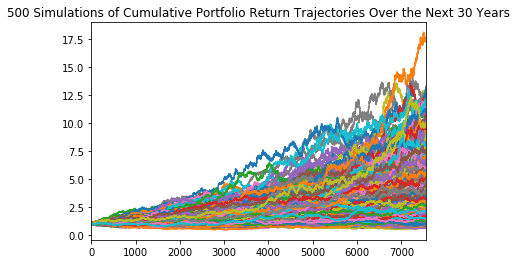

In [12]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [24]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns_30 = portfolio_cumulative_returns.iloc[252*30, :]
ending_cumulative_returns_30.tail()

495    7.288159
496    1.435723
497    3.888179
498    9.951780
499    1.474656
Name: 7560, dtype: float64

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[252*20, :]
ending_cumulative_returns_20.tail()

495    3.748898
496    1.136809
497    2.668960
498    4.088759
499    1.751002
Name: 5040, dtype: float64

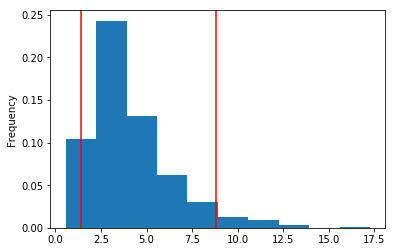

In [16]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns_30.quantile(q=[0.05, 0.95])
plt.figure();
ending_cumulative_returns_30.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [17]:
confidence_interval = ending_cumulative_returns_30.quantile(q=[0.05, 0.95])
confidence_interval

0.05    1.382673
0.95    8.790855
Name: 7560, dtype: float64

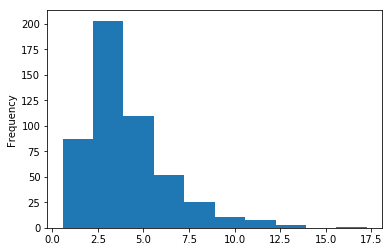

In [18]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
ending_cumulative_returns_30.plot(kind='hist', bins=10)

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [19]:
# YOUR CODE HERE
print(f"Expected cumulative portfolio return at 30 years for the 10th percentile is {round(np.percentile(ending_cumulative_returns_30,10),2)}.")
print(f"Expected cumulative portfolio return at 30 years for the 50th percentile is {round(np.percentile(ending_cumulative_returns_30,50),2)}.")
print(f"Expected cumulative portfolio return at 30 years for the 90th percentile is {round(np.percentile(ending_cumulative_returns_30,90),2)}.")

Expected cumulative portfolio return at 30 years for the 10th percentile is 1.84.
Expected cumulative portfolio return at 30 years for the 50th percentile is 3.52.
Expected cumulative portfolio return at 30 years for the 90th percentile is 7.04.


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [21]:
# YOUR CODE HERE
initial_investment = 50000
cumulative_pnl = initial_investment * ending_cumulative_returns_30
print(f"Expected portfolio return in dollars at the 10th percentile is ${round(np.percentile(cumulative_pnl,10),2)}.")
print(f"Expected portfolio return in dollars at the 50th percentile is ${round(np.percentile(cumulative_pnl,50),2)}.")
print(f"Expected portfolio return in dollars at the 90th percentile is ${round(np.percentile(cumulative_pnl,90),2)}.")

Expected portfolio return in dollars at the 10th percentile is $92058.69.
Expected portfolio return in dollars at the 50th percentile is $175798.48.
Expected portfolio return in dollars at the 90th percentile is $352050.91.


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [22]:
# YOUR CODE HERE
withdraw = 0.04*(round(np.percentile(cumulative_pnl,10),2))
projected_yearly_income=7389

if withdraw >= projected_yearly_income:
    print("4% withdraw is sufficient to cover the projected annual income")
else:
    print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [31]:
# YOUR CODE HERE
initial_investment_plus = 1.5*initial_investment
cumulative_pnl_plus = initial_investment_plus * ending_cumulative_returns_30
withdraw_plus = 0.04*(round(np.percentile(cumulative_pnl_plus,10),2))
projected_yearly_income=7389

if withdraw_plus >= projected_yearly_income:
    print("4% withdraw is sufficient to cover the projected annual income")
else:
    print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE